# Initialize packages

In [1]:
import numpy as np
import xarray as xr
import dfm_tools as dfmt

In [ ]:
from collections import ChainMap

In [2]:
import glob
import warnings

In [3]:
import dask
import os
import pandas as pd

In [4]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client

# Initialize Dask cluster

In [5]:
n_cores = 16
n_processes = 4
mem_lim = str(336)+'GB' #taking the entire node #str(int(np.floor(336/(n_cores*n_processes))))+'GB' # 768 GB of memory for one entire memory node on DelftBlue

In [6]:
mem_lim

'336GB'

In [7]:
cluster = SLURMCluster(name='dask-cluster',
                       cores=n_cores,
                       memory=mem_lim,
                       processes=n_processes,
                       interface='ib0',
                       queue='genoa',
                       walltime='04:00:00',
                       asynchronous=0)

In [8]:
print(cluster.job_script())

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p genoa
#SBATCH -n 1
#SBATCH --cpus-per-task=16
#SBATCH --mem=313G
#SBATCH -t 04:00:00

/home/mgeraeds/.conda/envs/dfm_proc_env/bin/python -m distributed.cli.dask_worker tcp://172.22.63.190:37687 --name dummy-name --nthreads 4 --memory-limit 78.23GiB --nworkers 4 --nanny --death-timeout 60 --interface ib0



In [9]:
cluster.scale(1)

In [10]:
client = Client(cluster)

In [11]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://172.22.63.190:8787/status,
Dashboard: http://172.22.63.190:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://172.22.63.190:37687,Workers: 0
Dashboard: http://172.22.63.190:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [13]:
client.dashboard_link

'http://172.22.63.190:8787/status'

# Load large (complete) dataset

In [14]:
input_regex = r'/projects/0/einf1300/saltis-wp3-1/C_Work/00_RMM3d_2022_simulations/computations/B02_2022_jul21-aug7/B02_2022_jul21-aug7_sm/RMM_dflowfm_2022_jul21_aug7_sm_000*_map.nc'

Check if any of the input files are corrupted.

In [15]:
## 1. Input tests
# 1.x. Loop through all of the files and write when there is something wrong with the file
file_list = glob.glob(input_regex)

# 1.x Make a list for corrupted files
corrupted = []

for file in file_list:

    file_name = file.split('/')[-1]
    
    try:
        test = xr.open_dataset(file)
    except:
        warnings.warn(f'The file {file_name} seems to be corrupted. Check your inputs.', UserWarning)
        corrupted.append(file)

If any of the files are corrupted, take them out of the file list to be loaded.

In [16]:
# I.x Check if there are any corrupted files in the listed files
if len(corrupted) > 0:
    print('There are corrupted files. These will be taken out of the file list for the next tests.')
    
# I.x Get the entire input list and remove the corrupted files
input_files = [f for f in glob.glob(input_regex) if not f in corrupted]

Append another random partition for testing purposes.

In [17]:
input_files.append('/projects/0/einf1300/saltis-wp3-1/C_Work/00_RMM3d_2022_simulations/computations/B02_2022_jul21-aug7/B02_2022_jul21-aug7_sm/RMM_dflowfm_2022_jul21_aug7_sm_0122_map.nc')

Load the data.

In [18]:
data_xr = dfmt.open_partitioned_dataset(input_files, chunks={'time':1})

>> xu.open_dataset() with 11 partition(s): 1 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


2 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


3 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


4 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


5 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


6 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


7 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


8 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


9 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


10 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


11 

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/xarray/core/dataset.py:278: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


: 15.95 sec
>> xu.merge_partitions() with 11 partition(s): 0.84 sec
>> some variables dropped with merging of partitions: ['mesh2d_face_x_bnd', 'mesh2d_face_y_bnd']
>> dfmt.open_partitioned_dataset() total: 16.79 sec


Determine the variables to keep for the next computation and define `ds`.

In [19]:
keep_vars = ['mesh2d_sa1', 'mesh2d_node_z', 'mesh2d_ucx', 'mesh2d_ucy', 'mesh2d_ucz', 'mesh2d_vol1', 'mesh2d_vicwwu','mesh2d_tem1', 'mesh2d_face_nodes', 'mesh2d_edge_nodes', 'mesh2d']

Visualize the loaded data to see if it's consistent.

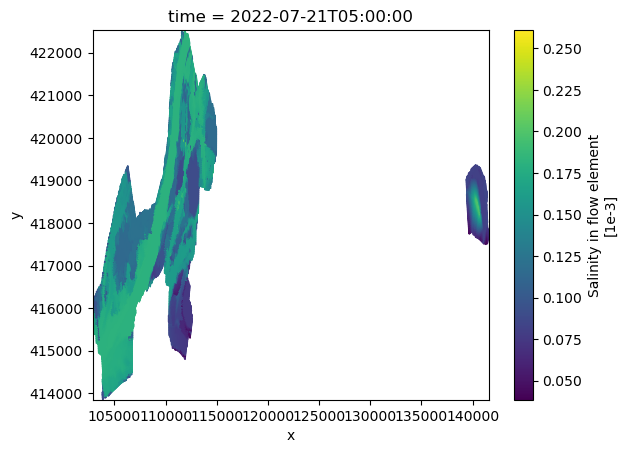

In [19]:
data_xr.isel(time=5, mesh2d_nLayers=45)['mesh2d_sa1'].ugrid.plot()

# Testing write total

In [20]:
out_file = r'testing_readwrite_map.nc'

In [41]:
# ds.ugrid.to_netcdf(out_file, compute=True)
with ProgressBar():
    ds.ugrid.to_netcdf(out_file, compute=True)

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 15.69 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [45]:
out_file = 'testing_readwrite2_map.nc'

In [46]:
xrds = ds.ugrid.to_dataset()
write_task = xrds.to_netcdf(out_file, compute=False)
with ProgressBar():
    write_task.compute()

/home/mgeraeds/.conda/envs/dfm_proc_env/lib/python3.9/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 14.87 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [53]:
testing_load = dfmt.open_partitioned_dataset('testing_readwrite_total_map.nc')

>> xu.open_dataset() with 1 partition(s): 1 [7 nan fillvalue attrs removed][nodomainvar] : 1.15 sec


# Testing write per variable

Determine the name of the output file.

In [27]:
out_file = r'variable_test.nc'

In [22]:
import xugrid as xu

In [35]:
encoding = {"mesh2d_face_nodes": {"dtype": "float32"}, "mesh2d_edge_nodes": {"dtype": "float64"}, "mesh2d_nNodes": {"dtype":"int32"}, "mesh2d_nFaces": {"dtype":"int32"}, "mesh2d_nEdges": {"dtype":"int32"}, "mesh2d_flowelem_zcc": {"dtype":"float32"}, "mesh2d_flowelem_zw": {"dtype":"float32"}, "mesh2d_face_x": {"dtype":"float32"}, "mesh2d_face_y": {"dtype":"float32"}, "mesh2d_edge_x": {"dtype":"float32"}, "mesh2d_edge_y": {"dtype":"float32"}, "mesh2d_sa1": {"dtype":"float32"}, "mesh2d_node_x": {"dtype":"float32"}, "mesh2d_node_y": {"dtype":"float32"}, "mesh2d_node_z": {"dtype":"float32"}, "mesh2d_ucx": {"dtype":"float32"}, "mesh2d_ucy": {"dtype":"float32"}, "mesh2d_ucz": {"dtype":"float32"}, "mesh2d_vol1": {"dtype":"float32"}, "mesh2d_vicwwu": {"dtype":"float32"}, "mesh2d_tem1":{"dtype":"float32"}}

`xugrid` implementation

In [25]:
ds = data_xr

In [28]:
# Define counter for possible subdivision of times in writing
i = 0
tds = ds.isel(time=slice(0,10))

for v in keep_vars:

    # > Select the time
    print(f'Starting selection of variable {v}...')
    vds = tds[v]#.astype('float32', casting='same_kind') # first test with reducing the data

    print(f'Loaded the dataset at variable {v}.')

    # > If there's encoding specified, make a subset for the variables in that dataset only
    var_list = list(vds.coords) + [vds.name]
    encoding_sub = dict(ChainMap(*[{f"{v}": encoding[v]} for v in var_list if v in encoding]))

    if i == 0:
        # > For t = 0 in the range of timesteps, check if there's a file
        # > already present. If it is, remove it.
        if os.path.isfile(out_file):
            os.remove(out_file)

        # Use dask.delayed to write file to disk
        print('Writing file to disk...')
        print(f"Outputfile: {out_file}")
        vds.ugrid.to_netcdf(out_file, mode='w', compute=True, encoding=encoding_sub)

    else:
        # Use dask.delayed to write file to disk
        print('Writing file to disk in append mode...')
        print(f"Outputfile: {out_file}")
        vds.ugrid.to_netcdf(out_file, mode='a', compute=True, encoding=encoding_sub)

    # writing_task.compute()
    vds.close()

    # > Update counter
    i += 1

Starting selection of variable mesh2d_sa1...
Loaded the dataset at variable mesh2d_sa1.
Writing file to disk...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_node_z...
Loaded the dataset at variable mesh2d_node_z.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucx...
Loaded the dataset at variable mesh2d_ucx.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucy...
Loaded the dataset at variable mesh2d_ucy.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucz...
Loaded the dataset at variable mesh2d_ucz.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vol1...
Loaded the dataset at variable mesh2d_vol1.
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vicwwu...
Loaded the dataset at v

`xarray` implementation

In [134]:
import xugrid as xu

In [30]:
ds = data_xr

In [36]:
# Define counter for possible subdivision of times in writing
i = 0

# > If it's an unstructured xu.UgridDataset, make the dataset into an xr.Dataset
if isinstance(ds, xu.core.wrap.UgridDataset):
    # > We need to store the hidden information as well, so get those variables
    hidden_vars = list(ds.ugrid.grid.to_dataset().variables)
    # > Add them to the keep_vars list
    keep_vars = keep_vars + hidden_vars
    # > Make the original dataset into an xr.Dataset
    ds = ds.ugrid.to_dataset()
    # > Only get the reduced dataset with keep_vars
    ds = ds[keep_vars]
    
else:
    ds = ds[keep_vars]

# > Select the required time period
tds = ds.isel(time=slice(0,10))

for v in keep_vars:

    # > Select the time
    print(f'Starting selection of variable {v}...')
    vds = tds[v] #.astype('float32', casting='same_kind') # first test with reducing the data

    # print(f'Loaded the dataset at variable {v}.')

    # > If there's encoding specified, make a subset for the variables in that dataset only
    var_list = list(vds.coords) + [vds.name]
    
    # try:
    encoding_sub = dict(ChainMap(*[{f"{v}": encoding[v]} for v in var_list if v in encoding]))
    # except:
    #     encoding_sub = {}

    if i == 0:
        # > For t = 0 in the range of timesteps, check if there's a file
        # > already present. If it is, remove it.
        if os.path.isfile(out_file):
            os.remove(out_file)

        # Use dask.delayed to write file to disk
        print('Writing file to disk...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file, mode='w', compute=True, encoding=encoding_sub)

    else:
        # Use dask.delayed to write file to disk
        print('Writing file to disk in append mode...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file, mode='a', compute=True, encoding=encoding_sub)

    # writing_task.compute()
    vds.close()

    print(f"Outputfile: {out_file}")
    # > Update counter
    i += 1

Starting selection of variable mesh2d_sa1...
Writing file to disk...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_node_z...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucx...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucy...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_ucz...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vol1...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_vicwwu...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_tem1...
Writing file to disk in append mode...
Outputfile: variable_test.nc
Starting selection of variable mesh2d_face_nodes...
Writing file to disk in append mode...
Outputfile: 

# Check reference without data reduction

In [37]:
out_file_ref = r'variable_test_ref.nc'

In [208]:
# Define counter for possible subdivision of times in writing
i = 0

# > If it's an unstructured xu.UgridDataset, make the dataset into an xr.Dataset
if isinstance(ds, xu.core.wrap.UgridDataset):
    # > We need to store the hidden information as well, so get those variables
    hidden_vars = list(ds.ugrid.grid.to_dataset().variables)
    # > Add them to the keep_vars list
    keep_vars = keep_vars + hidden_vars
    # > Make the original dataset into an xr.Dataset
    ds = ds.ugrid.to_dataset()
    # > Only get the reduced dataset with keep_vars
    ds = ds[keep_vars]
    
else:
    ds = ds[keep_vars]

# > Select the required time period
tds = ds.isel(time=slice(0,10))

for v in keep_vars:

    # > Select the time
    print(f'Starting selection of variable {v}...')
    vds = tds[v] #.astype('float32', casting='same_kind') # first test with reducing the data

    print(f'Loaded the dataset at variable {v}.')

    if i == 0:
        # > For t = 0 in the range of timesteps, check if there's a file
        # > already present. If it is, remove it.
        if os.path.isfile(out_file_ref):
            os.remove(out_file_ref)

        # Use dask.delayed to write file to disk
        print('Writing file to disk...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file_ref, mode='w', compute=True)

    else:
        # Use dask.delayed to write file to disk
        print('Writing file to disk in append mode...')
        # print(f"Outputfile: {out_file}")
        vds.to_netcdf(out_file_ref, mode='a', compute=True)

    # writing_task.compute()
    vds.close()

    print(f"Outputfile: {out_file_ref}")
    # > Update counter
    i += 1

Starting selection of variable mesh2d_sa1...
Loaded the dataset at variable mesh2d_sa1.
Writing file to disk...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_node_z...
Loaded the dataset at variable mesh2d_node_z.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_ucx...
Loaded the dataset at variable mesh2d_ucx.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_ucy...
Loaded the dataset at variable mesh2d_ucy.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_ucz...
Loaded the dataset at variable mesh2d_ucz.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_vol1...
Loaded the dataset at variable mesh2d_vol1.
Writing file to disk in append mode...
Outputfile: variable_test_ref.nc
Starting selection of variable mesh2d_vicwwu...

Re-load the dataset to check written contents (first into xarray and then into an xugrid.UgridDataset).

In [203]:
testing_load_xr = xr.open_dataset('variable_test.nc')
testing_load_xu = xu.open_dataset('variable_test.nc')

Visualize the data.

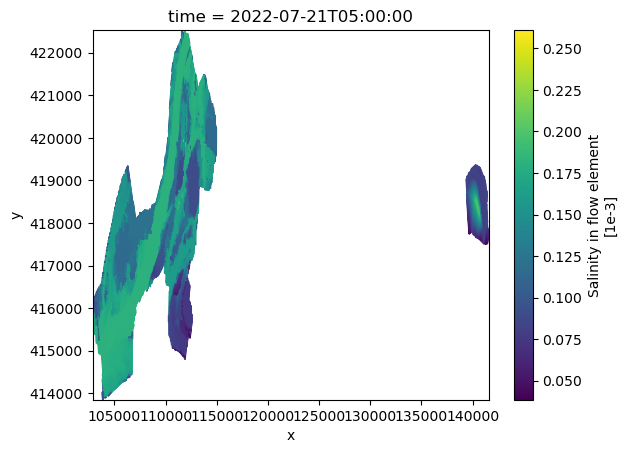

In [206]:
testing_load_xu.isel(time=5, mesh2d_nLayers=46)['mesh2d_sa1'].ugrid.plot()